**Clustering**

In [390]:
import numpy
import random
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.image as img
from PIL import Image

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image

**Exercise 1: Modify the HCM code to work for three groups**

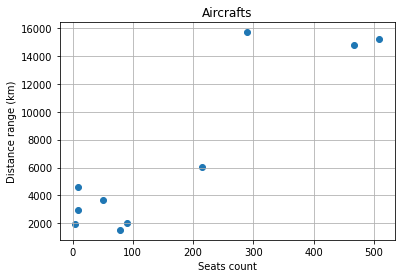

In [391]:

X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [392]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [393]:
pd.DataFrame(X_norm, columns = ['Seats count','Distance range (km)'])

,Seats count,Distance range (km)
0,0.007859,0.123567
1,0.017682,0.188535
2,0.017682,0.294904
3,0.153242,0.097325
4,0.176817,0.129936
5,0.098232,0.235669
6,0.917485,0.943631
7,1.000000,0.968153
8,0.569745,1.000000
9,0.422397,0.385032


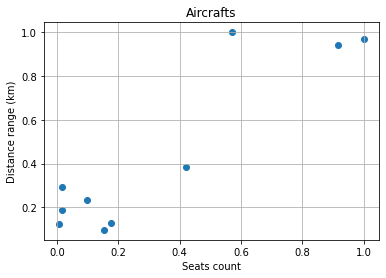

In [394]:
x1 = np.array(X_norm[:,0])
x2 = np.array(X_norm[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [395]:
data_set = X_norm
%store data_set

Stored 'data_set' (ndarray)


In [396]:
print(data_set[0])
print(centers[0])

[0.00785855 0.12356688]
[0.01229673 0.25183492]


In [397]:
%store -r data_set

### change here:
groups = 3

error_margin = 0.01
m=2
assignation=np.zeros((len(data_set),groups))


centers = np.array([[0.01229673, 0.25183492],
       [0.3689626 , 0.61904127],
       [0.95732769, 0.45059586]])

def calculate_distance(x,v):
    return sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)

def calculate_new_centers(u):
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    return new_centers

def calculate_differences(new_assignation, assignation):     
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))


def calculate_u_three(x, centers):
    u_array = np.zeros(groups)
    minimal_distance = []
    for group in range(groups):
        minimal_distance.append(calculate_distance(x, centers[group]))       
    min_group_id = np.argmin(minimal_distance)
    u_array[min_group_id] = 1
    return u_array

In [398]:
def cluster_hcm(assignation,centers):
    difference_limit_not_achieved=True
    new_centers = centers
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u_three(data_set[i], new_centers))
        new_centers = calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation, assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1
    return new_assignation, new_centers

In [399]:
new_assignation_hcm3, new_centers_hcm3 = cluster_hcm(assignation, centers)
pd.DataFrame(new_centers_hcm3)

,0,1
0,0.078585,0.178323
1,0.496071,0.692516
2,0.958743,0.955892


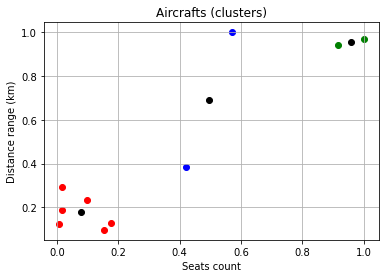

In [400]:
red = data_set[np.where(np.array(new_assignation_hcm3)[:,0]==1)]
blue = data_set[np.where(np.array(new_assignation_hcm3)[:,1]==1)]
green = data_set[np.where(np.array(new_assignation_hcm3)[:,2]==1)]

fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(green[:,0],green[:,1],c='green')
ax.scatter(np.array(new_centers_hcm3)[:,0],np.array(new_centers_hcm3)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

**Exercise 2: Plot the density clusters**

In [401]:
%store -r data_set

assignation = np.zeros(len(data_set))
distance_matrix = np.zeros((len(data_set), len(data_set)))
max_distance = 0.25
number_of_cluster = 0
min_points = 2


def calculate_distance_matrix():
    distance_matrix = np.zeros((len(data_set),len(data_set)))
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = calculate_distance(data_set[i], data_set[j])
    return distance_matrix


def get_closest_elements(distance_matrix, element_id):
    element_distances = distance_matrix[element_id]
    filtered = {}
    iter = 0
    for element in element_distances:
        if element < max_distance:
            filtered[iter] = element
        iter = iter + 1
    return filtered

def set_as_noise(assignation,element_id):
    assignation[element_id] = -1
    return assignation
    
def set_visited(elements, assignation, number_of_clusters):    
    for element_id in elements.keys():
        assignation[element_id] = number_of_clusters 
    return assignation

def cluster_density(assignation):
    number_of_cluster = 0
    distance_matrix = calculate_distance_matrix()
    element_ids = list(range(len(data_set)))
    random.shuffle(element_ids)
    for i in element_ids:
        if assignation[i] != 0:
            continue
        closest = get_closest_elements(distance_matrix, i)
        if len(closest) < min_points:
            assignation = set_as_noise(assignation,i)
        else:
            assignation = set_visited(closest, assignation, number_of_cluster)
            number_of_cluster = number_of_cluster + 1
    return assignation

In [402]:
new_assignation_density = cluster_density(assignation)

In [403]:
colors = ['red','blue','green','orange','black','yellow']
    
def get_group_objects(id):
  indexes = np.where(new_assignation_density == id)
  return data_set[indexes]
  


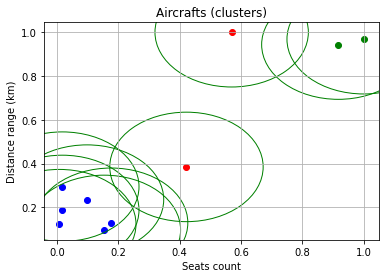

In [404]:
colors = ['red','blue','green','orange','black','yellow']

fig, ax = plt.subplots()

assigned_groups = new_assignation_density
for group in np.unique(assigned_groups):
    small_set = get_group_objects(group) 
    ax.scatter(small_set[:,0],small_set[:,1],c=colors.pop(0))
    for circle in small_set:
        circle1 = plt.Circle((circle[0],circle[1]), 0.25, color='green', fill=False)        
        ax.add_artist(circle1)
    
ax.set(xlabel='Seats count', ylabel='Distance range (km)',title='Aircrafts (clusters)')
ax.grid()
plt.show()

**Exercise 3: Build a dendrogram using dendrograms_history and pydot (done)**

In [405]:
def choose_cluster(current_level, distance_matrix):
    if type(current_level[0]) != list:
        both_idx = np.array(current_level)
        current = distance_matrix[both_idx[:,None], both_idx]
        diff = np.sum(current) / (current.shape[0] * current.shape[1] - len(current))
        return current_level, diff, 0
    highest_diff = 0
    cluster_id = 0
    for i in range(len(current_level)):
        both_idx = np.array(current_level[i])
        current = distance_matrix[both_idx[:, None], both_idx]
        diff = np.sum(current) / (current.shape[0] * current.shape[1]-len(current))
        if diff > highest_diff:
            highest_diff = diff
            cluster_id = i
    return current_level[cluster_id], highest_diff, cluster_id

def calculate_dendogram_distance_matrix_diana():
    distance_matrix=np.zeros((len(data_set), len(data_set)))
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = calculate_distance(calculate_centroid(data_set[i]),calculate_centroid(data_set[j]))
    return distance_matrix


def split(split_cluster, distance_matrix, diff):
    if len(split_cluster) == 2:
        cluster1 = [split_cluster[0]]
        cluster2 = [split_cluster[1]]
        return cluster1, cluster2
    split_threshold = diff
    both_idx = np.array(split_cluster)
    distances = distance_matrix[both_idx[:, None], both_idx]
    c1keys, c1counts = np.unique(np.argwhere(distances > split_threshold), return_counts=True)
    c2keys, c2counts = np.unique(np.argwhere(distances <= split_threshold), return_counts=True)
    cluster1_counts = dict(zip(np.array(split_cluster)[c1keys], c1counts))
    cluster2_counts = dict(zip(np.array(split_cluster)[c2keys], c2counts))
    cluster1 = []
    cluster2 = []
    choice = 0
    for item in split_cluster:
        if item not in cluster1_counts.keys():
            cluster2.append(item)
            continue
        if item not in cluster2_counts.keys():
            cluster1.append(item)
            continue
        if cluster1_counts[item] < cluster2_counts[item]:
            cluster2.append(item)
        elif cluster1_counts[item] > cluster2_counts[item]:
            cluster1.append(item)
        else:
            if choice == 0:
                cluster2.append(item)
                choice = 1
            else:
                cluster1.append(item)
                choice = 0
    return cluster1, cluster2

def cluster():
    dendrograms_history=[]
    current_dendrograms=[list(range(len(data_set)))]
    distance_matrix = calculate_dendogram_distance_matrix_diana()
    while len(current_dendrograms) != len(data_set):
        current_level = current_dendrograms[-1]
        current_cluster, diff, cluster_id = choose_cluster(current_level, distance_matrix)
        cluster1, cluster2 = split(current_cluster, distance_matrix, diff)
        if type(current_level[0]) != list:
            current_dendrograms.append([cluster1, cluster2])
        else:
            rest = current_level.copy()
            rest.pop(cluster_id)
            rest.append(cluster1)
            rest.append(cluster2)
            current_dendrograms.append(rest)
        hist = [{"acesor": current_cluster, "childs": [cluster1,cluster2]}]
        dendrograms_history.append(hist)
    return dendrograms_history


# dendrogram_hist_diana = cluster()

**Exercise 4: Implement the $s_{2}$ metric**

In [406]:
new_assignation_hcm, new_centers_hcm = cluster_hcm(assignation, centers)
new_centers_hcm3 = np.array([[0.42239686, 0.38503185],[0.07858546, 0.17832272],[0.82907662, 0.97059448]])

def calculate_s_2(centers):
    s2 = []
    for center_1 in range(len(centers)):
        for center_2 in range(len(centers)):
            if center_1 == center_2:
                break
            s2.append(calculate_distance(centers[center_1], centers[center_2]))
    return s2

In [407]:
s2_2 = calculate_s_2(new_centers_hcm)
s2_3 = calculate_s_2(new_centers_hcm3)

print(s2_2)
print(s2_3)

[0.6623357152687431, 1.1744318620467624, 0.5323834166597256]
[0.40116697670087065, 0.7129319889345509, 1.0912980907761376]
